loading the the neccessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import psycopg2
# from sqlalchemy import create_engine



In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

try:
    from user_overview import *
except ImportError :
    print("Error")

In [4]:
# DATABASE_TYPE = 'postgresql'
# DBAPI = 'psycopg2'
# HOST = 'localhost'
# PORT = '5432'
# DATABASE ='week_2'
# USER ='postgres'
# PASSWORD = 'aman'

In [5]:
# engine=create_engine(f'{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')

In [6]:
# query='select * from xdr_data;'
# data=pd.read_sql(query,engine)

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# data.to_csv("telecom.csv")

In [3]:
df_telcome= load_data('C:\\Users\\Aman\\Desktop\\kifyaw2\\data\\telecom.csv')
df_telcome.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
df_cleaned = clean_data(df_telcome)


In [6]:
top_manuf = df_cleaned['Handset Manufacturer'].value_counts()
top_used_handset = df_cleaned['Handset Type'].value_counts()

In [7]:
# Count occurrences of 'undefined'
undefined_counts = df_cleaned[
    (df_cleaned['Handset Manufacturer'] == 'undefined') |
    (df_cleaned['Handset Type'] == 'undefined')
]

print(undefined_counts.shape)

(8948, 56)


In [8]:
# cleaning the a with undefined values
df_cleaned = df_cleaned[
    (df_cleaned['Handset Manufacturer'] != 'undefined') &
    (df_cleaned['Handset Type'] != 'undefined')
]

In [9]:
df_cleaned['Handset'] = df_cleaned['Handset Manufacturer'] + " " + df_cleaned['Handset Type']

# Get the top handsets
top_handsets = df_cleaned['Handset'].value_counts().head(10)

# print(top_handsets)

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

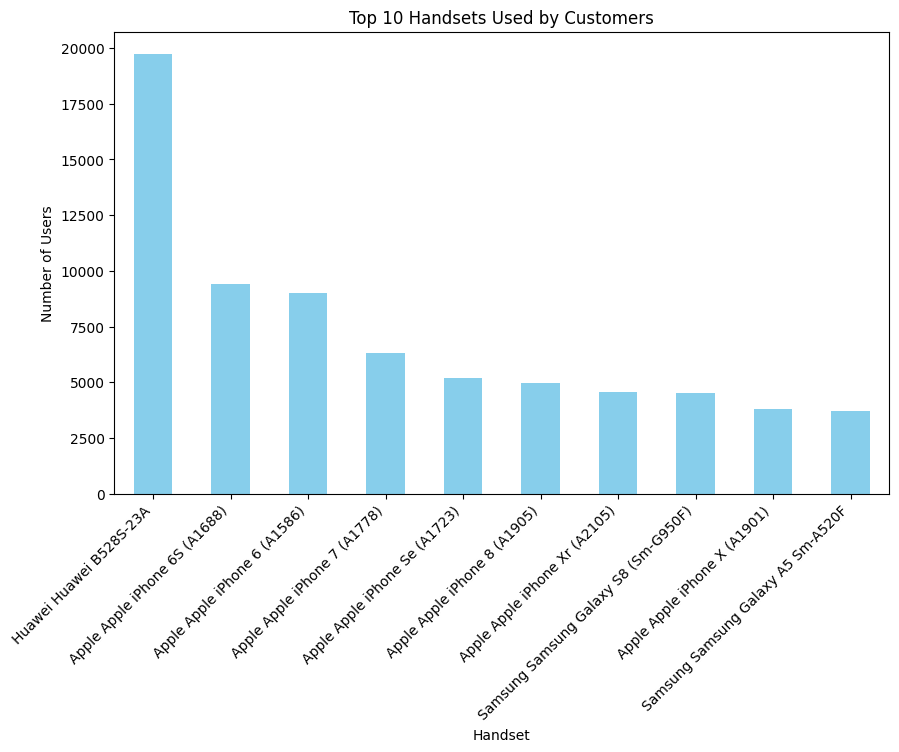

In [10]:
top_handsets_plot(top_handsets)

In [12]:
#  Identifying the top 3 manufactures
top_manuf = df_cleaned['Handset Manufacturer'].value_counts(3).index

# filter the data by the top 3 maunfacturers
filtered = df_cleaned[df_cleaned['Handset Manufacturer'].isin(top_manuf)]

# # Combine Manufacturer and Type for clarity
filtered['Handset'] = filtered['Handset Manufacturer'] + " " + filtered['Handset Type']

# Group by Manufacturer and Handset, count occurrences
grouped = filtered.groupby(['Handset Manufacturer', 'Handset']).size().reset_index(name='Count')

# Sort within each manufacturer to get the top 5 handsets
top_handsets_per_manufacturer = (
    grouped.sort_values(['Handset Manufacturer', 'Count'], ascending=[True, False])
    .groupby('Handset Manufacturer')
    .head(5)
)

# Display the results
# print(top_handsets_per_manufacturer)
top_handsets_per_manufacturer = pd.DataFrame(top_handsets_per_manufacturer)

# top 5 hanssets per top 3 manufactrurs
top_5_counts = top_handsets_per_manufacturer.nlargest(5, 'Count')

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

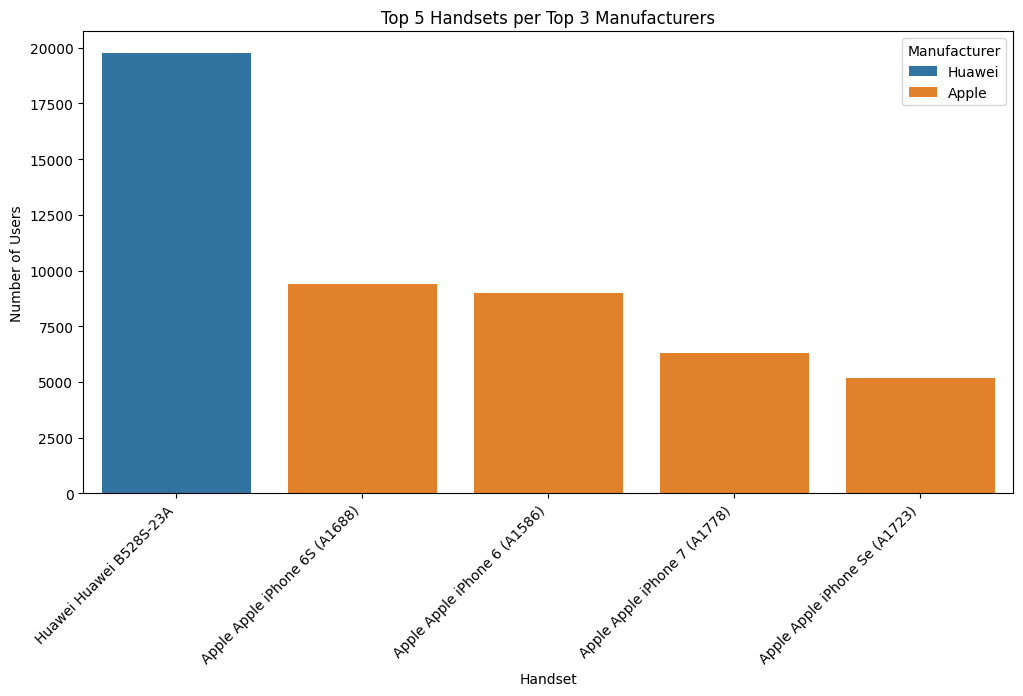

In [13]:
top_3_handsets_from_top_5(top_5_counts)

In [15]:
# Calculate total data volume per session
df_cleaned['Total Data Volume (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']

# Group by user (IMSI) and aggregate required metrics
user_behavior = df_cleaned.groupby('IMSI').agg(
    xDR_sessions=('Bearer Id', 'count'),  # Number of sessions
    total_session_duration=('Dur. (ms)', 'sum'),  # Total session duration
    total_download=('Total DL (Bytes)', 'sum'),  # Total download data
    total_upload=('Total UL (Bytes)', 'sum'),  # Total upload data
    total_data_volume=('Total Data Volume (Bytes)', 'sum'), # Total data volume
    youtube_data=('Youtube DL (Bytes)', 'sum'), #Total youtube useage
    social_media_data=('Social Media DL (Bytes)', 'sum') # total social media usage
).reset_index()

# Optional: Rename columns for clarity
user_behavior.rename(columns={
    'xDR_sessions': 'Number of xDR Sessions',
    'total_session_duration': 'Total Session Duration (ms)',
    'total_download': 'Total Download (Bytes)',
    'total_upload': 'Total Upload (Bytes)',
    'total_data_volume': 'Total Data Volume (Bytes)',

}, inplace=True)

# Display the aggregated DataFrame
user_behavior.head()


,IMSI,Number of xDR Sessions,Total Session Duration (ms),Total Download (Bytes),Total Upload (Bytes),Total Data Volume (Bytes),youtube_data,social_media_data
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,1.391536e+08,18980320.0,1500145.0
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,2.321240e+08,9839889.0,668596.0
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,8.517164e+07,5556563.0,3073697.0
3,2.082001e+14,1,86254.0,392918313.0,33583272.0,4.265016e+08,22414714.0,2542767.0
4,2.082001e+14,2,573923.0,961767023.0,71325004.0,1.033092e+09,4046597.0,3326811.0


In [16]:
# #### Variable Transformation and decile segmentation

# Segment users into deciles based on total session duration
df_cleaned['Total Data Volume'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']

# Create decile classes based on total session duration
df_cleaned['Decile'] = pd.qcut(df_cleaned['Dur. (ms)'], q=10, duplicates="drop", labels=False) + 1

# Compute total data volume per decile
decile_data = df_cleaned.groupby('Decile')['Total Data Volume'].sum().reset_index()
# print(decile_data)
decile_data.head()


,Decile,Total Data Volume
0,1,6.942936e+12
1,2,6.944675e+12
2,3,6.972367e+12
3,4,1.548636e+13
4,5,5.231450e+12


3. Analyze Basic Metrics (Mean, Median, etc)

In [17]:
basic_metrics = df_cleaned.describe()
basic_metrics

,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data Volume,Decile,Total Data Volume (Bytes)
count,139889.000000,1.398890e+05,139889.000000,139889.000000,1.398890e+05,1.398890e+05,1.398890e+05,1.398890e+05,139889.000000,139889.000000,...,1.398890e+05,1.398890e+05,1.398890e+05,1.398890e+05,1.398890e+05,1.398890e+05,1.398890e+05,1.398890e+05,139889.000000,1.398890e+05
mean,74874.370322,1.012426e+19,499.083237,498.897126,1.035791e+05,2.082016e+14,4.243922e+10,4.840580e+13,106.323164,17.617056,...,1.099827e+07,4.218068e+08,8.290264e+06,4.213526e+08,8.264821e+06,4.112086e+07,4.544048e+08,4.955257e+08,4.875659,4.955257e+08
std,43351.375589,2.893055e+18,288.688692,288.207025,7.916404e+04,2.220338e+10,2.525336e+12,2.238527e+13,541.054613,76.704787,...,6.360689e+06,2.440310e+08,4.780939e+06,2.432272e+08,4.767686e+06,1.128742e+07,2.442092e+08,2.444348e+08,2.471638,2.444348e+08
min,0.000000,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,3.500000e+01,2.516000e+03,5.900000e+01,1.432000e+04,1.480000e+02,2.866892e+06,7.114041e+06,2.895611e+07,1.000000,2.895611e+07
25%,37403.000000,7.349883e+18,249.000000,251.000000,5.756200e+04,2.082014e+14,3.365161e+10,3.548701e+13,34.000000,3.000000,...,5.460637e+06,2.101636e+08,4.134570e+06,2.105565e+08,4.152525e+06,3.321541e+07,2.428039e+08,2.842362e+08,3.000000,2.842362e+08
50%,74778.000000,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366373e+10,3.572921e+13,53.000000,7.000000,...,1.099199e+07,4.229581e+08,8.293120e+06,4.221024e+08,8.268738e+06,4.113725e+07,4.553122e+08,4.964184e+08,4.000000,4.964184e+08
75%,112632.000000,1.304243e+19,749.000000,750.000000,1.303470e+05,2.082018e+14,3.368396e+10,8.611970e+13,105.852059,17.669697,...,1.650502e+07,6.330509e+08,1.242992e+07,6.320030e+08,1.237854e+07,4.903068e+07,6.655927e+08,7.063741e+08,7.000000,7.063741e+08
max,149999.000000,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,9.559848e+08,9.000000,9.559848e+08


Graphical Univariant anlysis

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

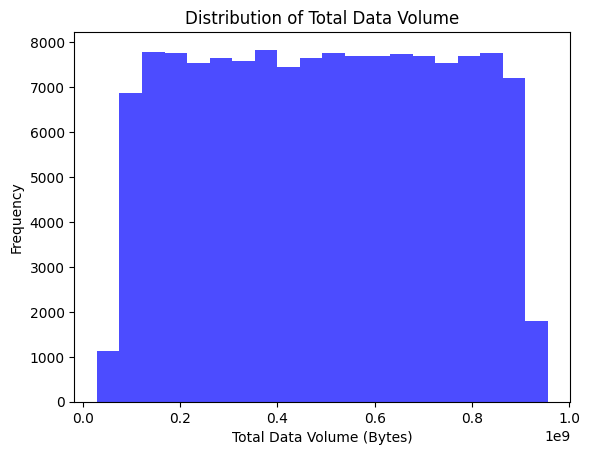

In [18]:
hist(df_cleaned)

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

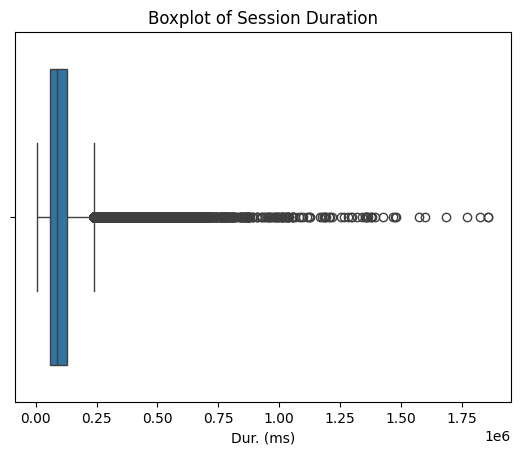

In [19]:
boxplot(df_cleaned)

Correlation Analysis

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw2\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

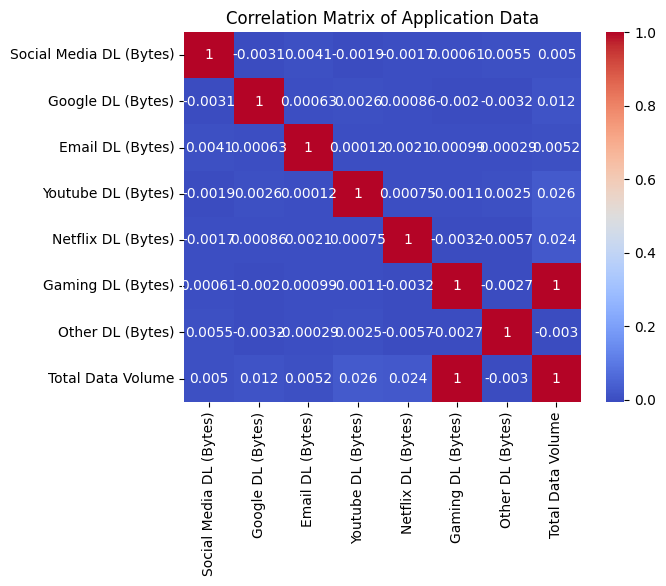

In [20]:
# Compute correlation matrix for application data
correlation_matrix = df_cleaned[[
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)','Total Data Volume'
]].corr()

heatmap(correlation_matrix)


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numeric columns for PCA
numeric_columns = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_columns])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Add PCA results to DataFrame
df_cleaned['PCA1'] = pca_result[:, 0]
df_cleaned['PCA2'] = pca_result[:, 1]


Explained Variance Ratio: [0.14439421 0.14350705]
